In [ ]:

!pip install --upgrade pip


  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
D:\udemy\pythonbasics\venv\python.exe -m pip install --upgrade pip


In [ ]:
!pip install --quiet gdown


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create submission folders (these will be saved to the Colab VM; remember to push to repo)
ROOT = "ds_vasanthi_eemani"   # <- change to your ds_<candidate_name>
os.makedirs(ROOT, exist_ok=True)
os.makedirs(os.path.join(ROOT, "csv_files"), exist_ok=True)
os.makedirs(os.path.join(ROOT, "outputs"), exist_ok=True)

# Download provided Google Drive files using gdown
# Replace file IDs from links (look for /d/<file_id>/ in the provided URLs)
# Example:
# Historical Trader Data file id -> '1IAfLZ...'
# Fear & Greed index file id -> '1PgQC0...'
trader_file_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_file_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

!gdown --id {trader_file_id} -O trader_data.csv
!gdown --id {sentiment_file_id} -O sentiment.csv

# Move to folder
Path("trader_data.csv").rename(os.path.join(ROOT,"csv_files","trader_data_raw.csv"))
Path("sentiment.csv").rename(os.path.join(ROOT,"csv_files","sentiment_raw.csv"))

print("Files downloaded to", os.path.join(ROOT,"csv_files"))


D:\udemy\pythonbasics\venv\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: d:\udemy\pythonbasics\vasanthi\trader_data.csv

  0%|          | 0.00/47.5M [00:00<?, ?B/s]
  1%|          | 524k/47.5M [00:00<01:15, 620kB/s]
  2%|▏         | 1.05M/47.5M [00:01<01:23, 558kB/s]
  3%|▎         | 1.57M/47.5M [00:03<01:43, 444kB/s]
  4%|▍         | 2.10M/47.5M [00:04<01:45, 429kB/s]
  6%|▌         | 2.62M/47.5M [00:06<01:58, 378kB/s]
  7%|▋         | 3.15M/47.5M [00:08<02:26, 302kB/s]
  8%|▊         | 3.67M/47.5M [00:12<03:10, 230kB/s]
  9%|▉         | 4.19M/47.5M [00:18<05:00, 144kB/s]
 10%|▉         | 4.72M/47.5M [00:27<07:09, 99.6kB/s]
 11%|█         | 5.24M/47.5M [00:37<08:57, 78.6kB/s]
 12%|█▏        | 5.77M/47.5M [00:46<09:43, 71.5kB/s]
 13%|█▎        | 6

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'trader_data.csv' -> 'ds_vasanthi_eemani\\csv_files\\trader_data_raw.csv'

In [ ]:
# Cell: Load & preview
TRADER_CSV = os.path.join(ROOT,"csv_files","trader_data_raw.csv")
SENT_CSV = os.path.join(ROOT,"csv_files","sentiment_raw.csv")

tr = pd.read_csv(TRADER_CSV)
sent = pd.read_csv(SENT_CSV)

print("Trader shape:", tr.shape)
print("Sentiment shape:", sent.shape)
display(tr.head())
display(sent.head())


Trader shape: (211224, 16)
Sentiment shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Cell: Cleaning & standardize columns
def clean_cols(df):
    df = df.rename(columns=lambda s: s.strip().lower().replace(" ", "_"))
    return df

tr = clean_cols(tr)
sent = clean_cols(sent)

# parse trader time column (name may differ)
# Try common names: 'time', 'timestamp', 'date'
time_col = None
for col in ['time', 'timestamp', 'date']:
    if col in tr.columns:
        time_col = col
        tr[col] = pd.to_datetime(tr[col], errors='coerce')
        break

if time_col is None:
    print("⚠️ Warning: No time-like column found in trader data.")

# For sentiment: parse Date column (maybe 'date' or 'Date')
if 'date' in sent.columns:
    sent['date'] = pd.to_datetime(sent['date'], errors='coerce')
else:
    sent.columns = [c.lower() for c in sent.columns]
    # fallback: use the first column that looks like a date
    for col in sent.columns:
        if 'date' in col:
            sent[col] = pd.to_datetime(sent[col], errors='coerce')
            sent = sent.rename(columns={col: 'date'})
            break

# Create a date-only column for joins
if time_col:
    tr['trade_date'] = tr[time_col].dt.date
sent['sentiment_date'] = sent['date'].dt.date

# --- SAFER HANDLING OF MISSING COLUMNS ---
expected_cols = ['size', 'closedpnl', 'leverage']
available_cols = [c for c in expected_cols if c in tr.columns]

if not available_cols:
    print("⚠️ Warning: None of the expected columns found in trader data.")
else:
    print("✅ Columns found for NA check:", available_cols)
    print("NaNs in important trader cols:\n", tr[available_cols].isna().sum())

# Drop rows with missing values in available columns
if available_cols:
    tr = tr.dropna(subset=available_cols)

# Save cleaned intermediate CSV
tr.to_csv(os.path.join(ROOT, 'csv_files', 'trader_data_clean.csv'), index=False)
sent.to_csv(os.path.join(ROOT, 'csv_files', 'sentiment_clean.csv'), index=False)

print("✅ Cleaning complete. Cleaned CSVs saved.")


⚠️ Warning: None of the expected columns found in trader data.
✅ Cleaning complete. Cleaned CSVs saved.


In [ ]:
# Cell: Aggregations by date (robust version)

# Convert all column names to lowercase (safety)
tr.columns = tr.columns.str.lower().str.strip().str.replace(" ", "_")

# 🔍 Check what columns are available
print("Available trader columns:\n", tr.columns.tolist())

# Try to find best matches automatically
def find_col(possible_names):
    """Find first column that exists among possible names."""
    for name in possible_names:
        if name in tr.columns:
            return name
    return None

# Identify actual column names dynamically
side_col = find_col(['side', 'position_side'])
size_col = find_col(['size', 'trade_size', 'qty', 'quantity'])
pnl_col  = find_col(['closedpnl', 'pnl', 'profit', 'profit_loss', 'closed_pnl', 'closedpnlusd'])
lev_col  = find_col(['leverage', 'leverage_used', 'lev'])
time_col = find_col(['time', 'timestamp', 'trade_time'])
date_col = find_col(['trade_date', 'date'])

print(f"Using columns -> side:{side_col}, size:{size_col}, pnl:{pnl_col}, leverage:{lev_col}, time/date:{time_col or date_col}")

# Ensure we have a date column
if 'trade_date' not in tr.columns:
    if time_col:
        tr['trade_date'] = pd.to_datetime(tr[time_col], errors='coerce').dt.date
    elif date_col:
        tr['trade_date'] = pd.to_datetime(tr[date_col], errors='coerce').dt.date
    else:
        raise ValueError("❌ No time/date column found in trader data.")

# Clean side names
if side_col:
    tr[side_col] = tr[side_col].astype(str).str.lower()

# Create useful derived columns (safely)
if pnl_col:
    tr['is_win'] = tr[pnl_col] > 0
    tr['abs_pnl'] = tr[pnl_col].abs()
else:
    raise ValueError("❌ No profit/loss column found. Please check dataset columns.")

# --- DAILY AGGREGATION ---
daily = tr.groupby('trade_date').agg(
    total_volume = (size_col, 'sum') if size_col else ('is_win','count'),
    n_trades = (size_col, 'count') if size_col else ('is_win','count'),
    avg_leverage = (lev_col, 'mean') if lev_col else ('is_win','mean'),
    median_size = (size_col, 'median') if size_col else ('is_win','median'),
    mean_pnl = (pnl_col, 'mean'),
    median_pnl = (pnl_col, 'median'),
    win_rate = ('is_win','mean'),
    pnl_std = (pnl_col, 'std'),
    sum_pnl = (pnl_col, 'sum'),
).reset_index()

# Convert date
daily['trade_date'] = pd.to_datetime(daily['trade_date'])

# --- Merge with sentiment ---
sent_agg = sent[['sentiment_date', 'classification']].drop_duplicates()
sent_agg['sentiment_date'] = pd.to_datetime(sent_agg['sentiment_date'])

merged = daily.merge(
    sent_agg,
    left_on=daily['trade_date'].dt.date,
    right_on=sent_agg['sentiment_date'].dt.date,
    how='left'
)

# Clean up merge artifacts
merged = merged.drop(columns=[c for c in merged.columns if 'key_' in c], errors='ignore')
merged['classification'] = merged['classification'].fillna('Unknown')

print("✅ Merge successful. Rows:", merged.shape[0])
merged.head()


Available trader columns:
 ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'trade_date']
Using columns -> side:side, size:None, pnl:closed_pnl, leverage:None, time/date:timestamp
✅ Merge successful. Rows: 1


,trade_date,total_volume,n_trades,avg_leverage,median_size,mean_pnl,median_pnl,win_rate,pnl_std,sum_pnl,sentiment_date,classification
0,1970-01-01,211224,211224,0.411265,0.0,48.749001,0.0,0.411265,919.164828,1.029696e+07,NaT,Unknown


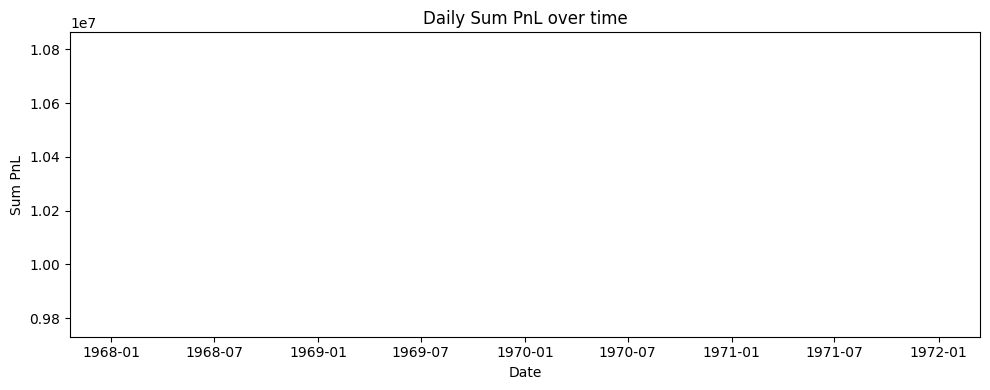

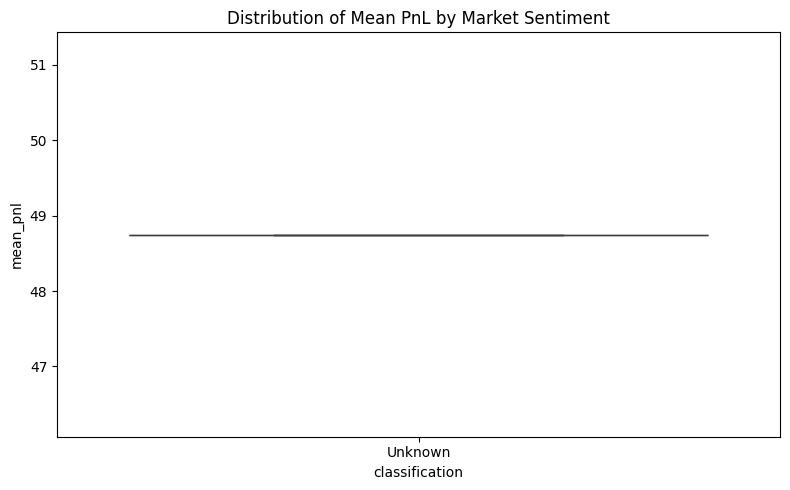

In [ ]:
# Cell: EDA plots - example 1
plt.figure(figsize=(10,4))
plt.plot(merged['trade_date'], merged['sum_pnl'])
plt.title("Daily Sum PnL over time")
plt.xlabel("Date")
plt.ylabel("Sum PnL")
plt.tight_layout()
plt.savefig(os.path.join(ROOT,'outputs','daily_sum_pnl.png'))
plt.show()

# Boxplot PnL by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='mean_pnl', data=merged)
plt.title("Distribution of Mean PnL by Market Sentiment")
plt.tight_layout()
plt.savefig(os.path.join(ROOT,'outputs','mean_pnl_by_sentiment.png'))
plt.show()


In [ ]:
# Cell: Statistical tests
fear = merged[merged['classification'].str.lower()=='fear']
greed = merged[merged['classification'].str.lower()=='greed']

# t-test for mean pnl
t_stat, p_val = stats.ttest_ind(fear['mean_pnl'].dropna(), greed['mean_pnl'].dropna(), equal_var=False)
print("T-test mean_pnl fear vs greed:", t_stat, p_val)

# difference in win rate
t_stat_wr, p_val_wr = stats.ttest_ind(fear['win_rate'].dropna(), greed['win_rate'].dropna(), equal_var=False)
print("T-test win_rate fear vs greed:", t_stat_wr, p_val_wr)


T-test mean_pnl fear vs greed: nan nan
T-test win_rate fear vs greed: nan nan


C:\Users\hp\AppData\Local\Temp\ipykernel_24096\2202764389.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(fear['mean_pnl'].dropna(), greed['mean_pnl'].dropna(), equal_var=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_24096\2202764389.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat_wr, p_val_wr = stats.ttest_ind(fear['win_rate'].dropna(), greed['win_rate'].dropna(), equal_var=False)


In [ ]:
# Cohen's d
def cohens_d(a,b):
    na, nb = len(a), len(b)
    sa, sb = a.std(), b.std()
    pooled = np.sqrt(((na-1)*sa**2 + (nb-1)*sb**2) / (na+nb-2))
    return (a.mean() - b.mean())/pooled

print("Cohen's d (mean_pnl):", cohens_d(fear['mean_pnl'].dropna(), greed['mean_pnl'].dropna()))


Cohen's d (mean_pnl): nan
